# Training a Neural Network for CSV Dataset
In this implementation, we read a CSV dataset via Google Drive, then build and train a neural network model , and finally test it on test dataset and calculate loss values. 


In [36]:
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Import libraries

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

### Loading training and test datasets 

In [38]:
# Load training train_data
train_path = 'data/train (1).csv'
train_data = pd.read_csv(train_path, delimiter = ',')
print('Training data\n', train_data.head())
print(train_data.tail())

x_train = torch.tensor(train_data['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(train_data['y'].values, dtype=torch.float32)

# Loading test train_data
test_path = 'data/test.csv'
test_data = pd.read_csv(test_path, delimiter = ',') 
print('\nTest data: \n',test_data.head())
print(test_data.tail())

x_test = torch.tensor(test_data['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(test_data['y'].values, dtype=torch.float32)

Training data
    Unnamed: 0         x         y
0           0  0.771270  2.474538
1           1  0.063558  1.192772
2           2  0.863103  2.912784
3           3  0.025419  1.078507
4           4  0.731994  2.473164
    Unnamed: 0         x         y
75          75  0.828738  2.738827
76          76  0.325330  1.805654
77          77  0.939499  2.888963
78          78  0.330898  1.542666
79          79  0.366362  1.709265

Test data: 
    Unnamed: 0         x         y
0           0  0.304614  1.615251
1           1  0.155995  1.347700
2           2  0.662522  2.234106
3           3  0.107891  1.298501
4           4  0.909320  2.893834
    Unnamed: 0         x         y
15          15  0.514234  1.948241
16          16  0.522733  2.037755
17          17  0.046450  1.133306
18          18  0.611853  2.253318
19          19  0.427541  1.889197


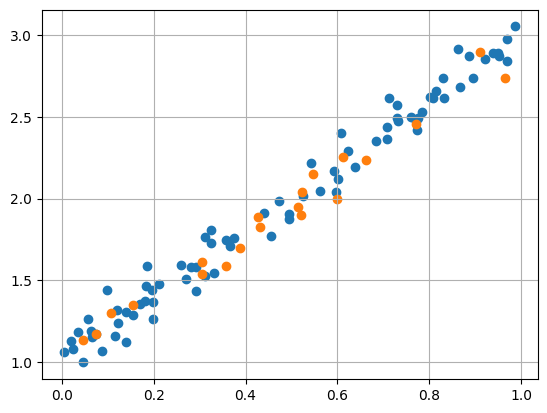

In [39]:
# Plot datasets
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.grid(True)
plt.show()

### Build NN model

In [40]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

### Define loss function

In [41]:
loss_fn = nn.MSELoss()

### Define optimization

In [42]:
model.parameters()

<generator object Module.parameters at 0x000001C11B1E8E40>

In [43]:
for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[0.7814]], requires_grad=True)
bias Parameter containing:
tensor([-0.6194], requires_grad=True)


In [44]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Train loooooop! 

In [45]:
N = 500 # number of epochs
loss_hist= []
for i in range(N):
    y_pred = model(x_train)
    loss = loss_fn(y_pred.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    print(f'Epochs {i}: ',loss.item())

Epochs 0:  4.99789571762085
Epochs 1:  4.753518581390381
Epochs 2:  4.521124839782715
Epochs 3:  4.3001275062561035
Epochs 4:  4.089966773986816
Epochs 5:  3.8901114463806152
Epochs 6:  3.700056552886963
Epochs 7:  3.5193214416503906
Epochs 8:  3.3474488258361816
Epochs 9:  3.184004306793213
Epochs 10:  3.028573989868164
Epochs 11:  2.880765914916992
Epochs 12:  2.7402052879333496
Epochs 13:  2.606536865234375
Epochs 14:  2.4794230461120605
Epochs 15:  2.3585422039031982
Epochs 16:  2.24358868598938
Epochs 17:  2.1342711448669434
Epochs 18:  2.0303142070770264
Epochs 19:  1.9314546585083008
Epochs 20:  1.8374420404434204
Epochs 21:  1.7480392456054688
Epochs 22:  1.6630198955535889
Epochs 23:  1.5821690559387207
Epochs 24:  1.5052825212478638
Epochs 25:  1.432165503501892
Epochs 26:  1.362633466720581
Epochs 27:  1.2965104579925537
Epochs 28:  1.2336291074752808
Epochs 29:  1.1738307476043701
Epochs 30:  1.1169641017913818
Epochs 31:  1.0628852844238281
Epochs 32:  1.0114576816558838
E

Epochs 128:  0.020948562771081924
Epochs 129:  0.020542247220873833
Epochs 130:  0.020155174657702446
Epochs 131:  0.019786404445767403
Epochs 132:  0.019435018301010132
Epochs 133:  0.019100211560726166
Epochs 134:  0.018781136721372604
Epochs 135:  0.018477043136954308
Epochs 136:  0.018187180161476135
Epochs 137:  0.017910869792103767
Epochs 138:  0.017647437751293182
Epochs 139:  0.017396269366145134
Epochs 140:  0.01715674437582493
Epochs 141:  0.01692829839885235
Epochs 142:  0.016710404306650162
Epochs 143:  0.016502538695931435
Epochs 144:  0.016304222866892815
Epochs 145:  0.016114966943860054
Epochs 146:  0.015934348106384277
Epochs 147:  0.015761934220790863
Epochs 148:  0.015597322955727577
Epochs 149:  0.015440146438777447
Epochs 150:  0.015290036797523499
Epochs 151:  0.0151466503739357
Epochs 152:  0.015009649097919464
Epochs 153:  0.014878727495670319
Epochs 154:  0.014753597788512707
Epochs 155:  0.01463396567851305
Epochs 156:  0.014519566670060158
Epochs 157:  0.0144

### Vizualizzzze

In [46]:
x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_viz = model(x_viz)

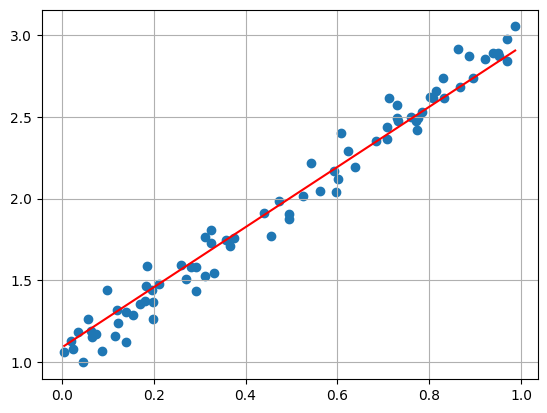

In [48]:
plt.scatter(x_train, y_train)
plt.plot(x_viz.detach(),y_viz.detach(), color='red')
plt.grid(True)
plt.show()

#### Learning curve

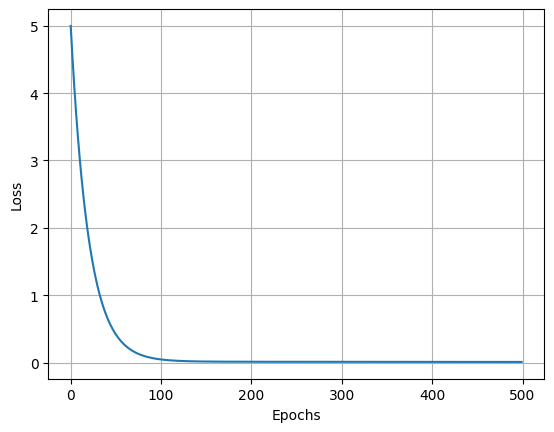

In [50]:
plt.plot(range(N), loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Test

In [53]:
y_pred = model(x_test)
F.l1_loss(y_pred.squeeze(), y_test)


tensor(0.0767, grad_fn=<MeanBackward0>)